이미지는 기본적으로 2차원인데 뉴럴 네트워크 방식대로 1차원으로 변환시키면 이미지 특징이 사라져버린다는 단점이 있음

cnn은 이차원을 유지하면서 이미지의 특징을 뽑아내는 방식
여러가지 필터를 적용하여 특징을 뽑아냄

정답값이랑 다를 시 백프로파게이션으로 다른 필터를 넣어서 학습시킴 - 필터값을 계속 학습시킴

필터가 곧 가중치!!

CNN은 필터를 커널이라고 부르고 필터 하나로 이미지를 하나 만들어냄 -> 이 한장을 피처맵이라고 부름

피처맵을 줄여서 학습에 사용하는데 이때 줄이는 것을 맥스 풀링이라고 함

커널 사용해서 피처맵 만들고 풀링하고의 반복 과정

특징이 적당히 추출되었다면 분류기를 활용해서 분류하고 결과를 추출함

앞단은 특징 추출기 뒷단은 분류기로 이루어져 있음

CNN 모델을 개조할 때에는 특징 추출기는 잘 건들지 않고 분류기를 고쳐서 사용함

합성곱을 통해 각 자리 이미지와 필터를 곱하는 연산으로 특징을 추출함

stride - 몇칸씩 움질일 것인가
padding - 0으로 채워진 테두리를 만들어 합성곱 연산 후 크기가 줄지 않도록 함
또는 이미지의 외곽이라는 사실을 모델에게 알려주고 싶을 때

맥스풀링은 가장 큰 값을 뽑아내는 것

분류기에 넣을 때에는 1차원으로 flatten 되어야 함


#합성곱신경망 다중분류(fashion-mnist - 흑백이미지)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf

##1.데이터 준비

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

##2.데이터 정보

In [6]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
samples = np.random.randint(60000, size = 25)
samples

array([42906, 49005, 15376, 52680, 40093,  9486, 50671, 18057, 13694,
        8818, 28508, 39556, 17011, 54164,  3375, 10017, 30035, 59906,
        4608, 59732, 16972, 28897, 30595, 33967, 50141])

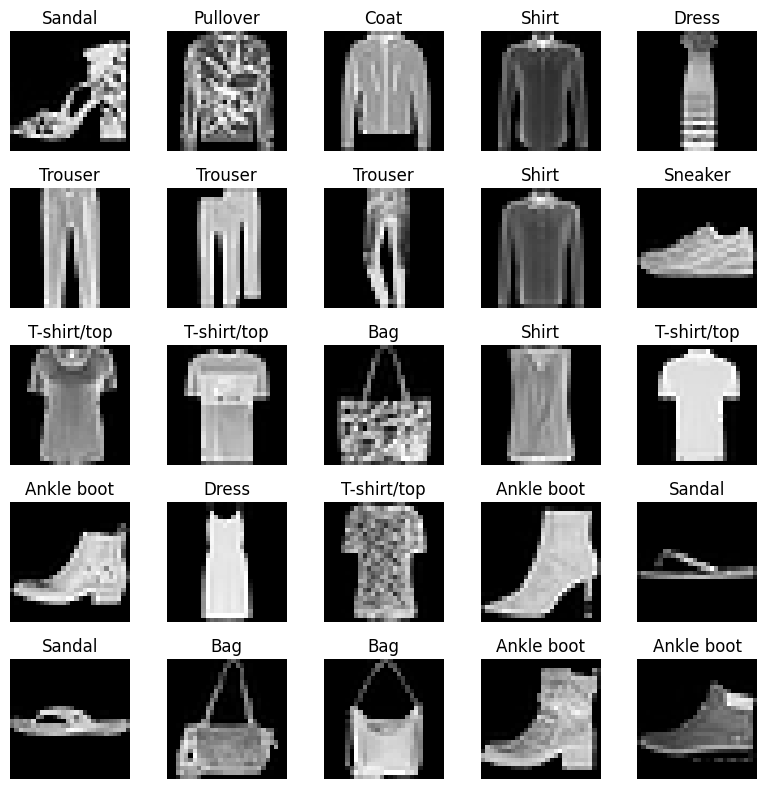

In [7]:
fig = plt.figure(figsize=(8,8))
for i, idx in enumerate(samples):
  # 한줄에 5개씩 5줄
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[idx], cmap="gray")
  plt.axis('off')
  plt.title(classes[y_train[idx]])
plt.tight_layout()
plt.show()

##3.데이터 분리

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

### 스케일링
- min-max scaling

In [10]:
# min-max scaler
# 이미지를 255로 나누는 방법
# 공식도 있긴 함
# 속도가 빠름

X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

# robust scaler
# 이미지에 이상치가 있을 것 같을 때

###원핫인코딩

In [11]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

## 4.모델 만들기

In [12]:
X_train_s.shape

(48000, 28, 28)

In [29]:
# 3차원으로 데이터를 바꿔줘야 함
# 맨 앞의 -1 이 배치 임
X_train_s = X_train_s.reshape(-1,28,28,1)
X_val_s = X_val_s.reshape(-1,28,28,1)
X_train_s.shape

(48000, 28, 28, 1)

In [22]:
from keras import layers

model = keras.Sequential([
    layers.Input(shape=(28,28,1)),
    # Conv2D는 기본적으로 3차원을 받게 되어있음
    # 높이, 넓이, 채널
    # 필터 개수, 필터 넓이
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    # 여기까지는 2차원 특징 추출기
    # 이걸 거치면 2차원 피처맵이 1차원으로 펴짐
    layers.Flatten(),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=10, activation='softmax')]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │          12,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,090 (125.35 KB)

 Trainable params: 32,090 (125.35 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [34]:
epochs = 3
batch_size = 64

histroy = model.fit(X_train_s, y_train_o,
                    epochs=epochs,
                    batch_size = batch_size,
                    validation_data=(X_val_s, y_val_o)
                    )

Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - acc: 0.8062 - loss: 0.5261 - val_acc: 0.8567 - val_loss: 0.3980
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 73s 82ms/step - acc: 0.8600 - loss: 0.3943 - val_acc: 0.8647 - val_loss: 0.3631
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - acc: 0.8787 - loss: 0.3446 - val_acc: 0.8801 - val_loss: 0.3280


##5.테스트

In [35]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

###스케일링

In [38]:
X_test_s = X_test.astype('float32')/255.

###인코딩

In [39]:
y_test_e = to_categorical(y_test)

###사이즈변경

In [41]:
X_test_s = X_test_s.reshape(-1,28,28,1)
X_test_s.shape

(10000, 28, 28, 1)

###예측하기

In [42]:
y_pred = model.predict(X_test_s)
y_pred[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


array([[2.01020648e-05, 9.29232087e-08, 2.39482051e-05, 1.08417698e-05,
        4.38547650e-05, 1.11338971e-02, 1.36684193e-05, 2.45996024e-02,
        9.78540978e-04, 9.63175416e-01],
       [9.29631107e-03, 4.87925149e-08, 9.59320545e-01, 8.30943463e-05,
        6.12174813e-03, 1.41097928e-07, 2.51731072e-02, 6.17067564e-10,
        4.98569398e-06, 4.09305478e-10],
       [5.40633494e-07, 9.99989092e-01, 1.08941378e-09, 3.98273505e-06,
        5.78196159e-06, 1.22381527e-08, 2.12737490e-08, 6.64550567e-11,
        6.46397325e-07, 4.61057353e-13],
       [2.47523167e-06, 9.99863863e-01, 5.73493697e-09, 1.22529251e-04,
        1.00158022e-05, 8.89729801e-09, 4.98827660e-07, 1.11103682e-09,
        7.42595660e-07, 1.29840236e-11],
       [9.09887254e-02, 3.51090054e-03, 5.97028695e-02, 1.03068361e-02,
        4.24939841e-02, 2.21927785e-05, 7.92465329e-01, 1.64460344e-05,
        4.89882426e-04, 2.80124459e-06],
       [1.77452675e-05, 9.99908745e-01, 2.74783787e-07, 1.86746693e-05,
   

###시각화

In [43]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

In [48]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [51]:
y_test_e = np.argmax(y_test_e, axis=1)
y_test_e

array([9, 2, 1, ..., 8, 1, 5])

acc: 0.8776
recall: 0.8776
precision: 0.8796
f1: 0.8781


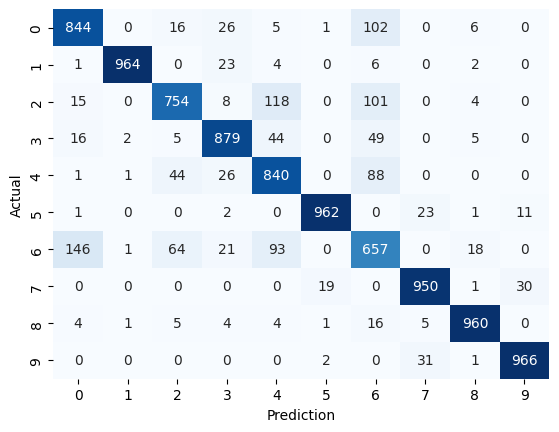

In [52]:
print_metrics(y_test_e, y_pred)